\SI{(1.06(0.15)e-06)}{\micro\tesla\per\meter}，與理論值\SI{1e-6}{\micro\tesla\per\meter}誤差為\SI{ 6.3}{\percent}


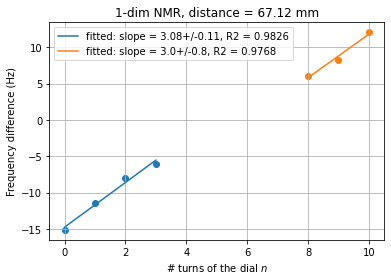

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, ifft
from scipy.optimize import curve_fit
from uncertainties import ufloat
from sklearn.metrics import r2_score 

def value_compare(exp_value, th_value_text, unit = ''):
    th_value = float(th_value_text)
    error = ((exp_value - th_value)/th_value ).n * 100
    exp_value_text = str(exp_value).replace('+/-', '(') + ')'
    # th_value_text = str(format(th_val e,'e')).replace('+/-', '\pm')
    print('\SI{'+ exp_value_text + '}{' + unit + '}，與理論值\SI{' + th_value_text + '}{' + unit + '}誤差為\SI{' + f'{error: .1f}' + '}{\percent}')


fig, ax = plt.subplots(1, figsize=(6,4))

func = lambda x, a, b : a*x+b

xs = np.array([0.,1.,2.,3.])
ys = np.array([-15.15,-11.44,-8.,-6.039])
popt, pcov = curve_fit(func, xs, ys)
slope1 = ufloat(popt[0], np.sqrt(pcov[1,1])/5)
inter = ufloat(popt[1], np.sqrt(pcov[1,1]))
ys_fit = func(xs, *popt)
r2 = r2_score(ys, ys_fit)
ax.scatter(xs, ys)
label = f'fitted: slope = {slope1}, R2 = {r2:.4f}'
ax.plot(xs, ys_fit, linestyle = '-', label = label)


xs = np.array([8.,9.,10.])
ys = np.array([6.079,8.279,12.08])
popt, pcov = curve_fit(func, xs, ys)
slope2 = ufloat(popt[0], np.sqrt(pcov[1,1])/5)
inter = ufloat(popt[1], np.sqrt(pcov[1,1]))
ys_fit = func(xs, *popt)
r2 = r2_score(ys, ys_fit)
ax.scatter(xs, ys)
label = f'fitted: slope = {slope2}, R2 = {r2:.4f}'
ax.plot(xs, ys_fit, linestyle = '-', label = label)

slope = (slope1+slope2)/2
beta = 1e-6
gamma = 2.675e8
dx = 54.12e-3
dx = 67.12e-3
beta_exp = slope*2*np.pi/dx/gamma
value_compare(beta_exp, '1e-6', '\\micro\\tesla\\per\\meter')

ax.grid()

ax.legend()

ax.set_title(f'1-dim NMR, distance = {dx*1e3} mm')
ax.set_xlabel(r'# turns of the dial $n$')
ax.set_ylabel('Frequency difference (Hz)')

fig.savefig('nmr1.png')


\SI{(1.055(0.008)e-06)}{\micro\tesla\per\meter}，與理論值\SI{1e-6}{\micro\tesla\per\meter}誤差為\SI{ 5.5}{\percent}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


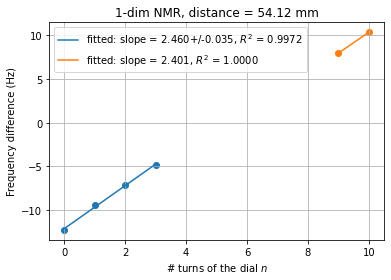

In [2]:
fig, ax = plt.subplots(1, figsize=(6,4))

func = lambda x, a, b : a*x+b

xs = np.array([0.,1.,2.,3.])
ys = np.array([-12.28,
-9.44,
-7.16,
-4.839])
popt, pcov = curve_fit(func, xs, ys)
slope1 = ufloat(popt[0], np.sqrt(pcov[1,1])/5)
inter = ufloat(popt[1], np.sqrt(pcov[1,1]))
ys_fit = func(xs, *popt)
r2 = r2_score(ys, ys_fit)
ax.scatter(xs, ys)
label = rf'fitted: slope = {slope1}, $R^2$ = {r2:.4f}'
ax.plot(xs, ys_fit, linestyle = '-', label = label)


xs = np.array([9.,10.])
ys = np.array([7.959,10.36])
popt, pcov = curve_fit(func, xs, ys)
slope2 = popt[0]
ys_fit = func(xs, *popt)
r2 = r2_score(ys, ys_fit)
ax.scatter(xs, ys)
label = rf'fitted: slope = {slope2}, $R^2$ = {r2:.4f}'
ax.plot(xs, ys_fit, linestyle = '-', label = label)

slope = (slope1+slope2)/2
beta = 1e-6
gamma = 2.675e8
dx = 54.12e-3
beta_exp = slope*2*np.pi/dx/gamma
value_compare(beta_exp, '1e-6', '\\micro\\tesla\\per\\meter')

ax.grid()

ax.legend()

ax.set_title(f'1-dim NMR, distance = {dx*1e3:.2f} mm')
ax.set_xlabel(r'# turns of the dial $n$')
ax.set_ylabel('Frequency difference (Hz)')

fig.savefig('nmr2.png')
